In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras import layers

from keras.datasets import mnist

In [2]:
# 데이터 불러오기
# 이미지 데이터 구성 (이미지, 라벨)
(X_train, _), (X_test, _) = mnist.load_data() # y_train, y_test 사용 안함.

In [3]:
# 0과 1사이 (0-1)로 정규화
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [4]:
# 훈련용 이미지, 평가용 이미지 개수 확인하기
print(len(X_train), len(X_test))

60000 10000


In [6]:
# 28*28 크기의 이미지 60000장
X_train.shape

(60000, 28, 28)

In [7]:
# prod() : 주어진 배열이나 튜플의 모든 요소 곱하기
np.prod(X_train.shape[1:])

784

In [10]:
# 차원 축소
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [11]:
# 모델 생성
# encoding 되는 차원 수
encoding_dim = 32

# input layer
input_img = keras.Input(shape=(784, )) # 784 >> 1치원으로 들어간다.

# hidden layer(784 차원 >> 32 차원)
encoded = layers.Dense(encoding_dim, activation='relu')(input_img) # Dense() : 1차원 (압축)

# output layer (32 차원 >> 784 차원)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# Q. 784차원으로 나오면 다중 분류이기 때문에 softmax 써야 하는 것 아님?
# A. 일반적으로 다중분류는 softmax, 하지만 autoencoder는 복원하는 인공지능 기법(출력값은 0 또는 1 사이로 제한한다.)이다.

# autoencoder model
autoencoder = keras.Model(input_img, decoded)

In [12]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# autoencoder 학습하기
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# fitting >> training
autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Q. 왜 X_train을 두번 넣을까?
# A. 앞의 X_train : 입력값, 뒤의 X_train : 출력값
# >> 입력데이터와 출력데이터가 동일한 자기 지도 학습
# >> 복원하는 과정에서 중요한 특징을 추출하기 위해!

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - loss: 0.3904 - val_loss: 0.1888
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.1794 - val_loss: 0.1551
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.1497 - val_loss: 0.1322
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.1303 - val_loss: 0.1200
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.1192 - val_loss: 0.1119
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.1117 - val_loss: 0.1061
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - loss: 0.1064 - val_loss: 0.1020
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0999 - val_loss: 0.0971
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0978 - val_loss: 0.0955
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - loss: 0.0966 - val_loss: 0.0946
Epoch 12/20
235/235 ━━━━━━━━━━━━

In [14]:
# 학습 결과 확인
decoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step


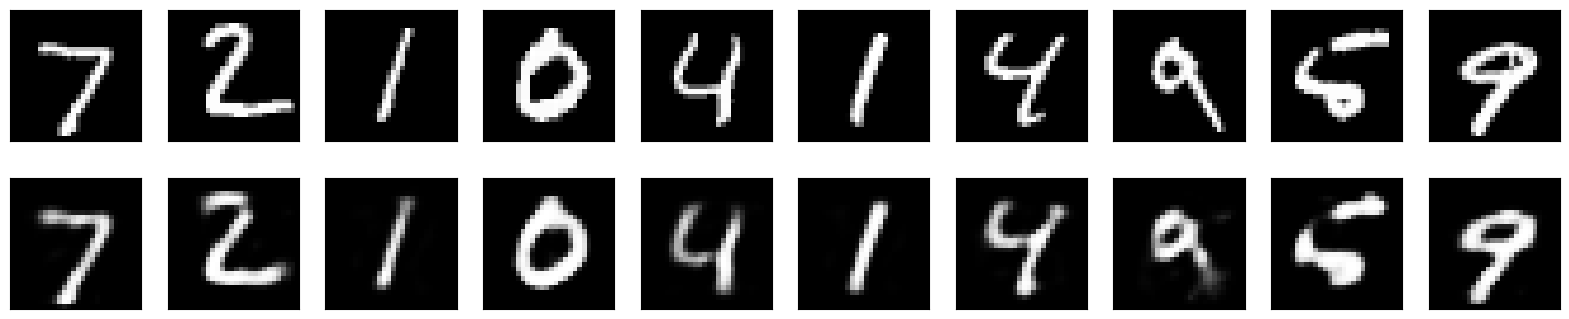

In [16]:
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # display original images
    ax = plt.subplot(2, n, i+1)
    # 2차원 이미지로 복원하기
    plt.imshow(X_test[i].reshape(28, 28))
    # 흑백
    plt.gray()
    # 축 보이지 않도록
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction (복원된 이미지)
    ax = plt.subplot(2, n, i+1+n)
    # 2차원 이미지로 복원하기
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    # 흑백
    plt.gray()
    # 축 보이지 않도록
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()